In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.htfa as HTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db',
                                     mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz')

In [5]:
htfa = HTFA.HierarchicalTopographicFactorAnalysis(list(affvids_db.all()), mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100)

12/14/2018 20:06:27 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/14/2018 20:06:43 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-23_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/14/2018 20:07:00 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-15_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
12/14/2018 20:07:15 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-15_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

In [6]:
losses = htfa.train(num_steps=1000, learning_rate=1e-2, log_level=logging.INFO, num_particles=1,
                    batch_size=15, use_cuda=True, checkpoint_steps=500, blocks_batch_size=8)

/home/eli/AnacondaProjects/HTFATorch/htfa_torch/tfa_models.py:241: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  softplus(params['voxel_noise'])[0],
12/14/2018 20:25:57 [Epoch 1] (167860ms) Posterior free-energy 8.50008934e+09
12/14/2018 20:25:57 Saving checkpoint...
12/14/2018 20:28:47 [Epoch 2] (168325ms) Posterior free-energy 7.08710195e+09
12/14/2018 20:31:35 [Epoch 3] (168081ms) Posterior free-energy 6.28831130e+09
12/14/2018 20:34:23 [Epoch 4] (167911ms) Posterior free-energy 5.75286886e+09
12/14/2018 20:37:10 [Epoch 5] (167882ms) Posterior free-energy 5.46954342e+09
12/14/2018 20:39:58 [Epoch 6] (167843ms) Posterior free-energy 5.28541850e+09
12/14/2018 20:42:46 [Epoch 7] (167804ms) Posterior free-energy 5.14559539e+09
12/14/2018 20:45:34 [Epoch 8] (167987ms) Posterior free-energy 5.04776653e+09
12/14/2018 20:48:22 [Epoch 9] (168429ms) Posterior free-energy 4.97535590e+09
12/14

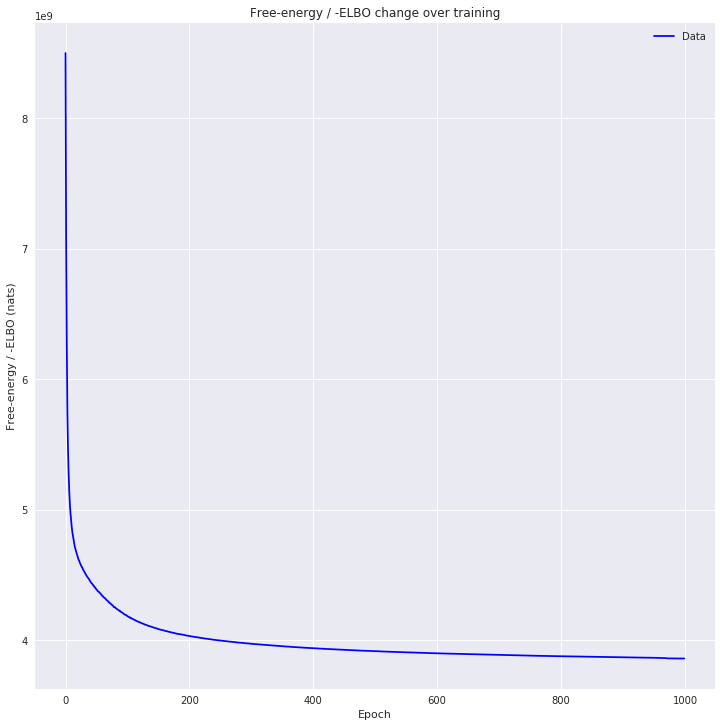

In [7]:
utils.plot_losses(losses)

In [8]:
def task_labeler(b):
    if 'heights' in b.task:
        return 'Heights'
    elif 'social' in b.task:
        return 'Social threat'
    elif 'spider' in b.task:
        return 'Spiders'
    elif 'rest' in b.task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(b):
    if b.task == 'rest':
        return 'Rest'
    else:
        return 'Task'

12/17/2018 14:17:50 Plotting factors for Participant 26, run 1


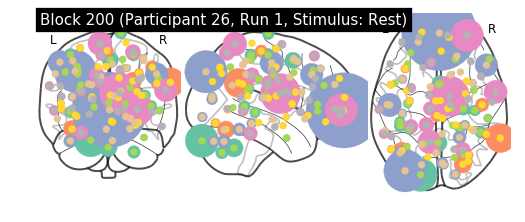

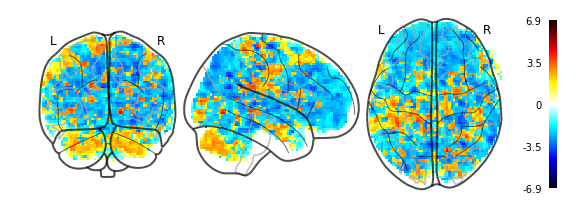

12/17/2018 14:17:54 Reconstruction Error (Frobenius Norm): 1.41472644e+03 out of 1.68562842e+03


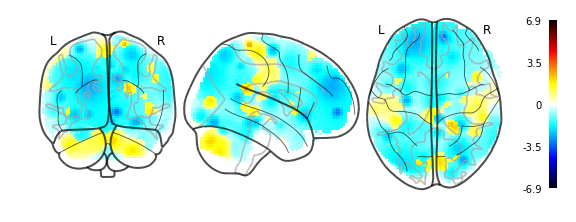

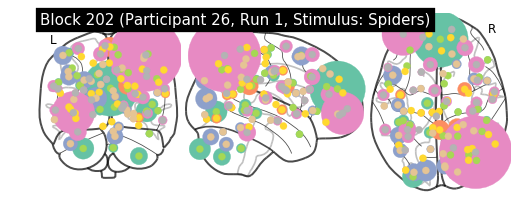

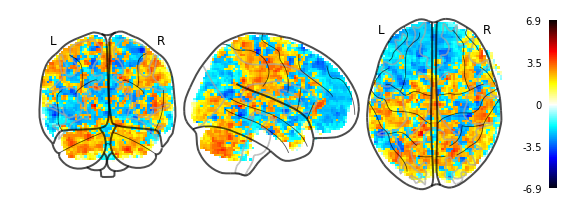

12/17/2018 14:17:57 Reconstruction Error (Frobenius Norm): 1.85008557e+03 out of 1.51342151e+03


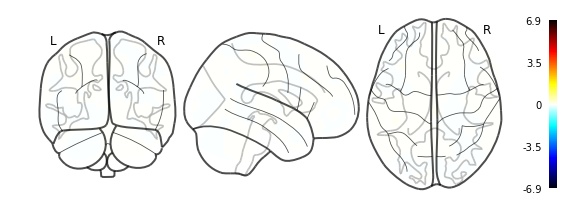

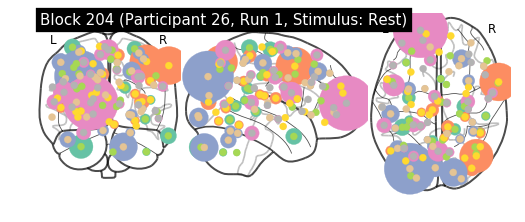

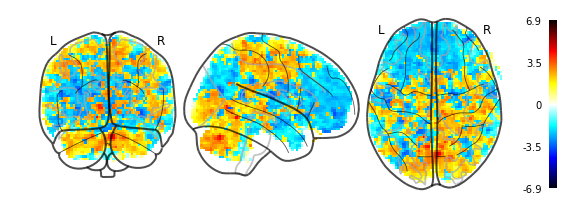

12/17/2018 14:18:01 Reconstruction Error (Frobenius Norm): 1.86706970e+03 out of 1.53202197e+03


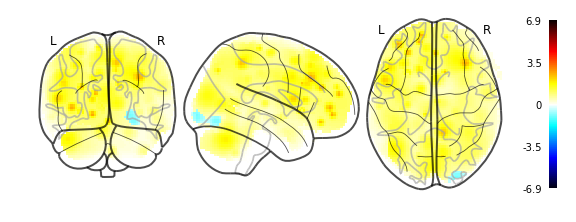

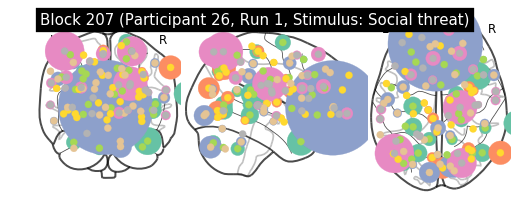

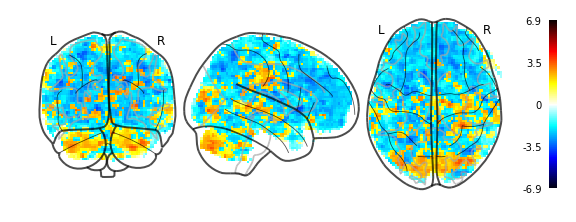

12/17/2018 14:18:05 Reconstruction Error (Frobenius Norm): 1.96364941e+03 out of 1.53154614e+03


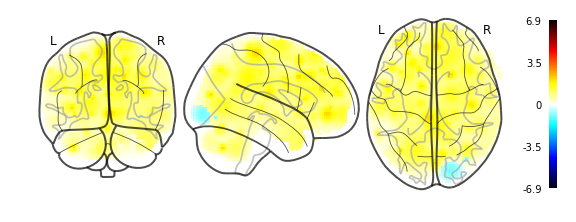

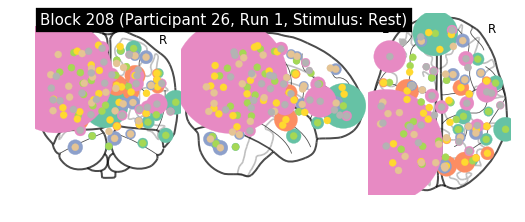

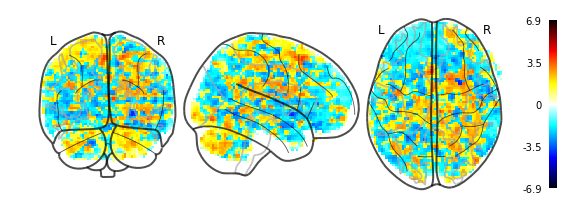

12/17/2018 14:18:09 Reconstruction Error (Frobenius Norm): 1.74226184e+03 out of 1.32117957e+03


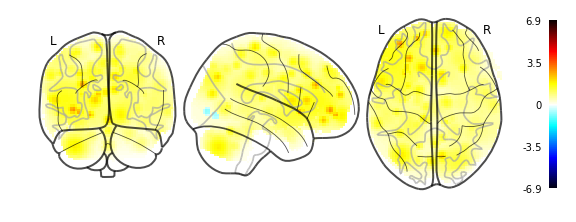

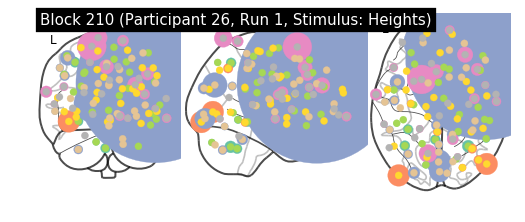

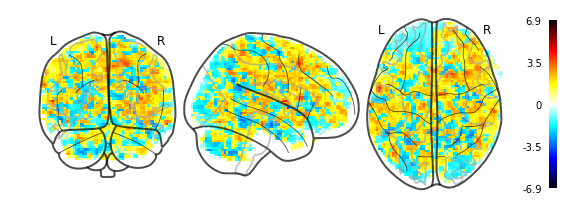

12/17/2018 14:18:13 Reconstruction Error (Frobenius Norm): 1.54847852e+03 out of 1.22436670e+03


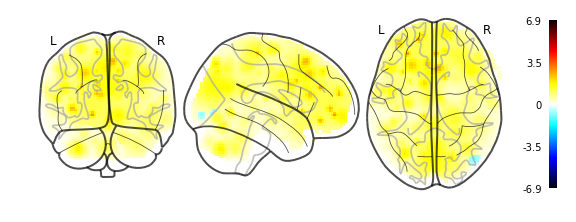

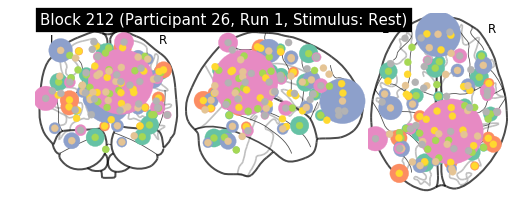

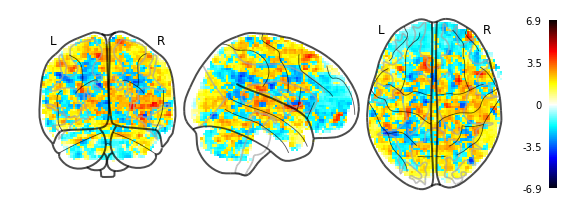

12/17/2018 14:18:17 Reconstruction Error (Frobenius Norm): 1.52579663e+03 out of 1.31115344e+03


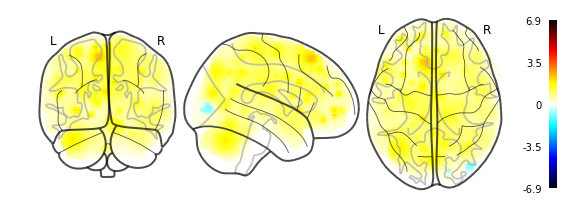

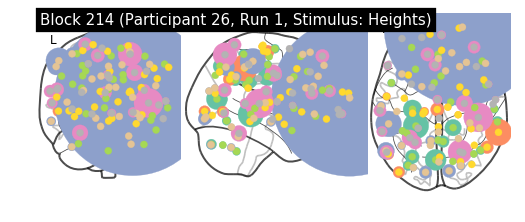

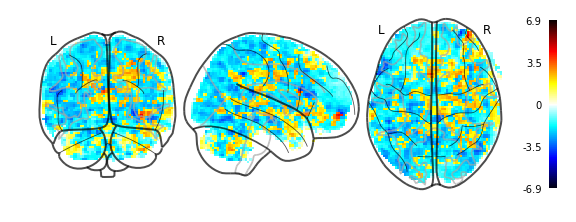

12/17/2018 14:18:20 Reconstruction Error (Frobenius Norm): 1.78426257e+03 out of 1.26408362e+03


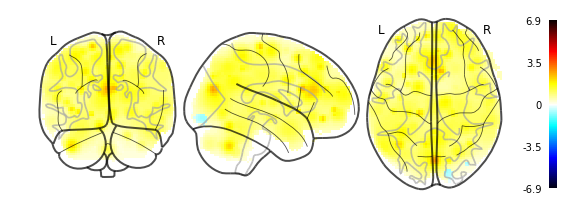

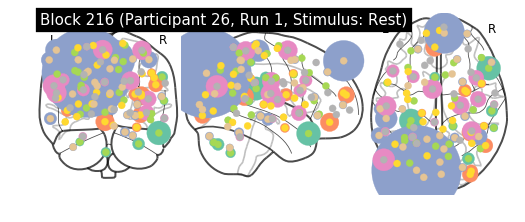

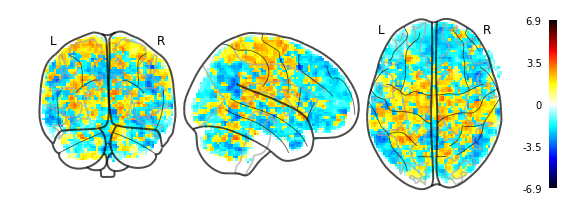

12/17/2018 14:18:24 Reconstruction Error (Frobenius Norm): 1.50667163e+03 out of 1.21558899e+03


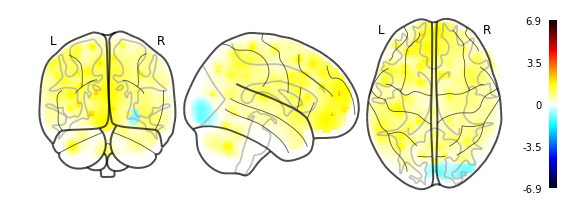

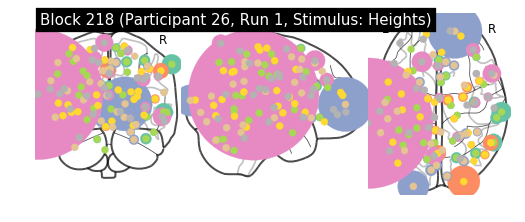

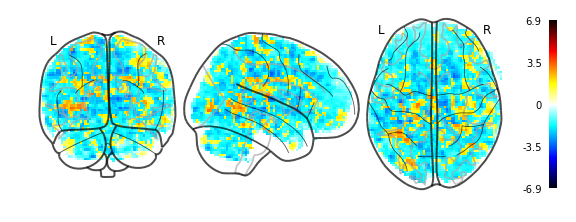

12/17/2018 14:18:28 Reconstruction Error (Frobenius Norm): 1.59014539e+03 out of 1.22087683e+03


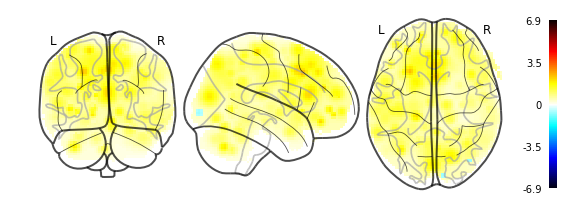

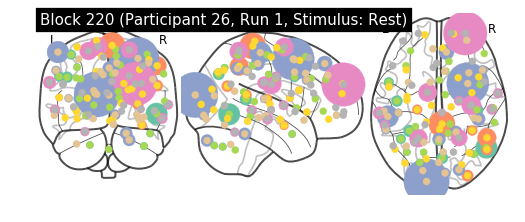

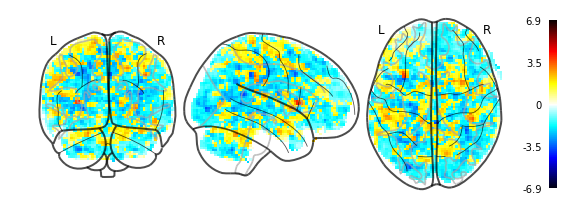

12/17/2018 14:18:32 Reconstruction Error (Frobenius Norm): 1.25047522e+03 out of 1.09710876e+03


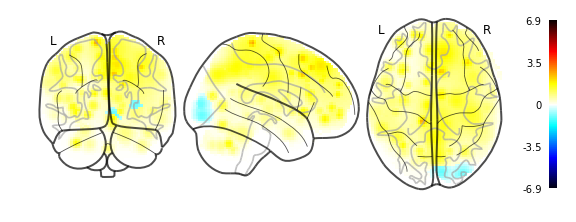

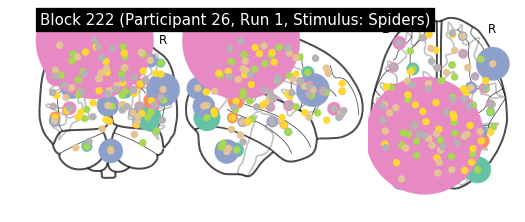

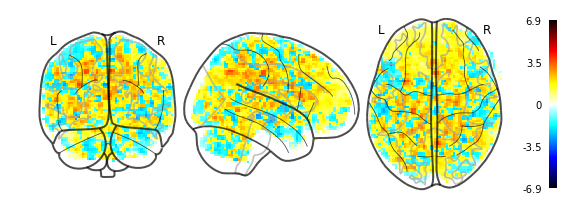

12/17/2018 14:18:35 Reconstruction Error (Frobenius Norm): 1.19568372e+03 out of 1.08975781e+03


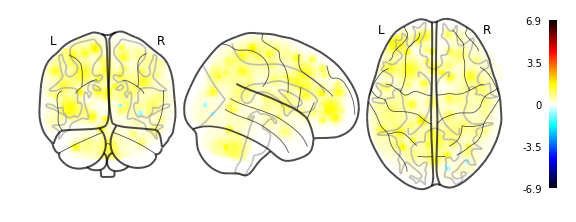

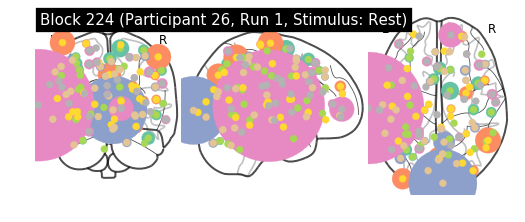

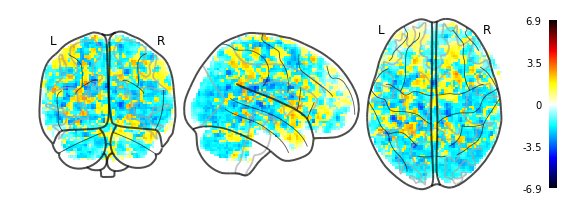

12/17/2018 14:18:39 Reconstruction Error (Frobenius Norm): 1.22952197e+03 out of 1.18161487e+03


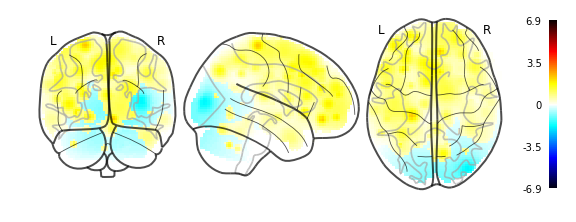

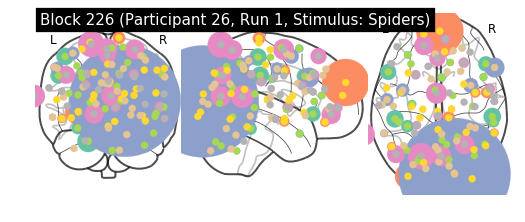

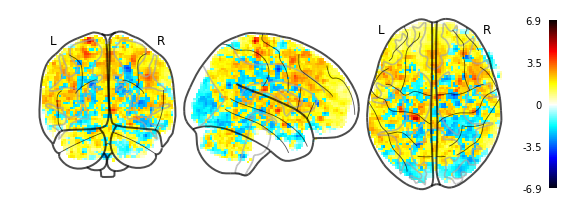

12/17/2018 14:18:43 Reconstruction Error (Frobenius Norm): 1.34330493e+03 out of 1.23166003e+03


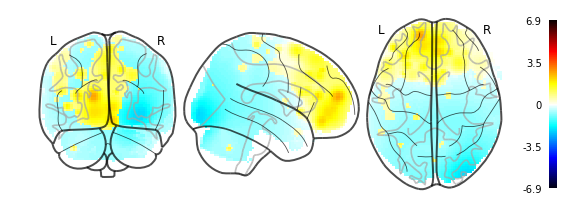

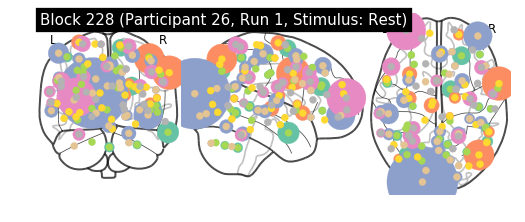

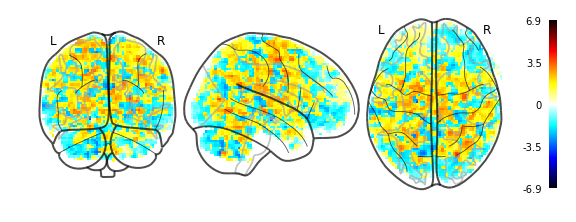

12/17/2018 14:18:47 Reconstruction Error (Frobenius Norm): 1.28582239e+03 out of 1.20657776e+03


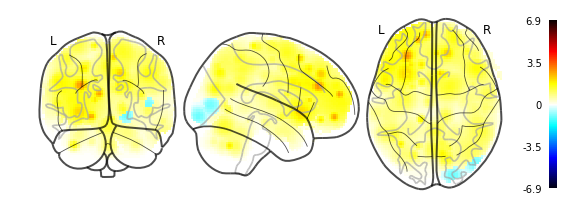

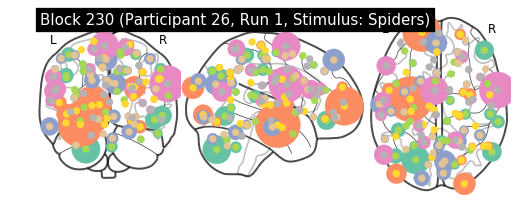

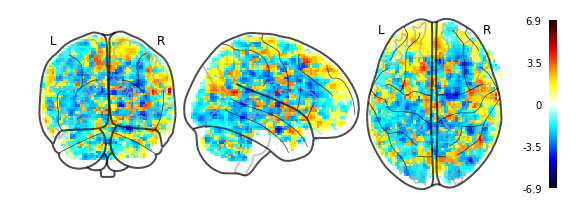

12/17/2018 14:18:51 Reconstruction Error (Frobenius Norm): 1.39818408e+03 out of 1.16973999e+03


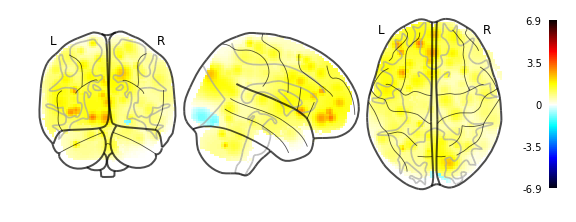

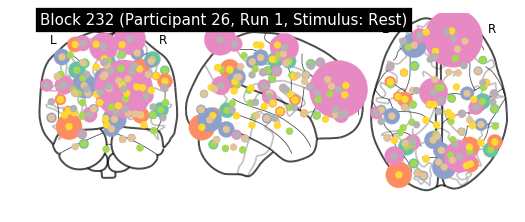

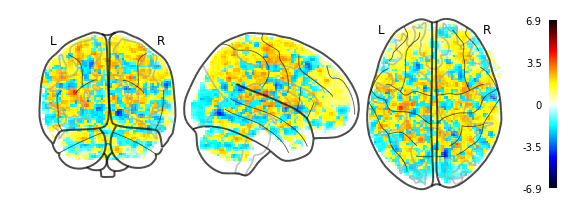

12/17/2018 14:18:55 Reconstruction Error (Frobenius Norm): 1.24038892e+03 out of 1.10883179e+03


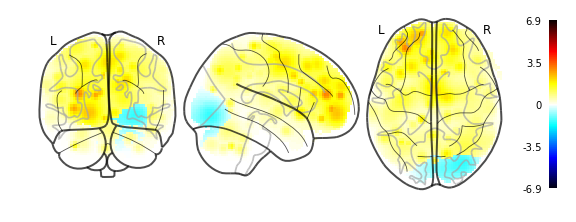

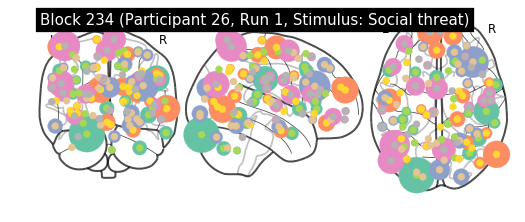

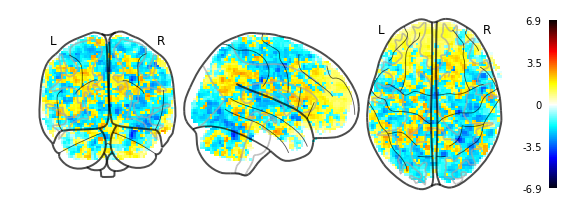

12/17/2018 14:18:59 Reconstruction Error (Frobenius Norm): 1.50574280e+03 out of 1.25115051e+03


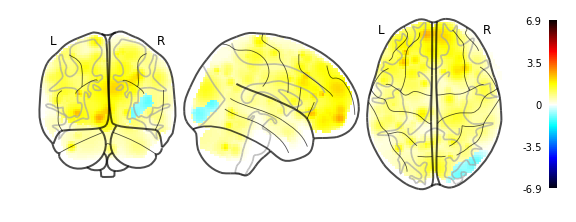

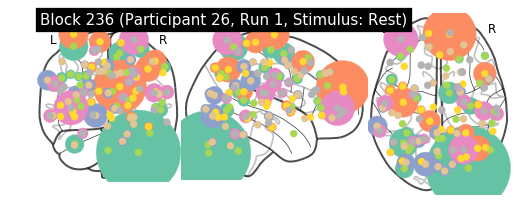

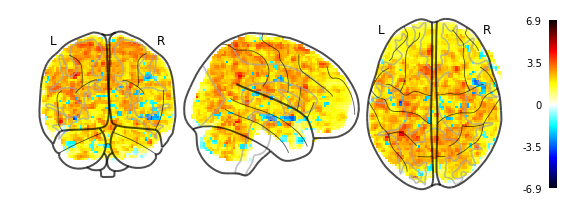

12/17/2018 14:19:02 Reconstruction Error (Frobenius Norm): 1.50047961e+03 out of 1.22237512e+03


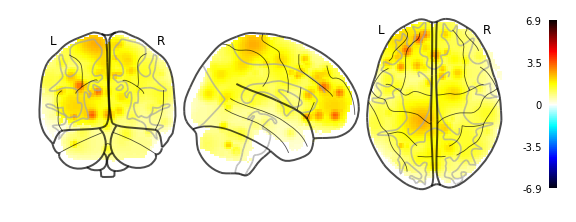

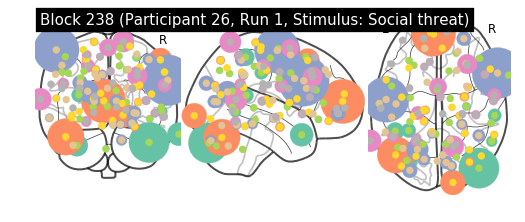

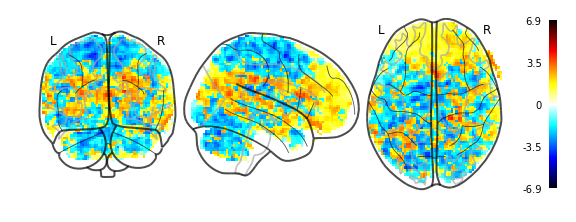

12/17/2018 14:19:06 Reconstruction Error (Frobenius Norm): 1.58151733e+03 out of 1.33680408e+03


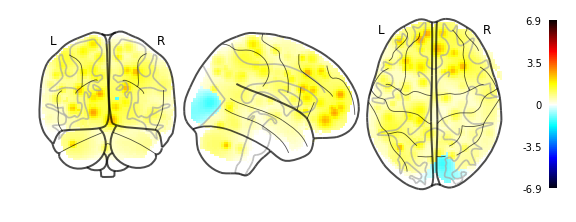

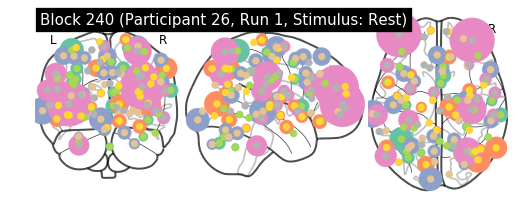

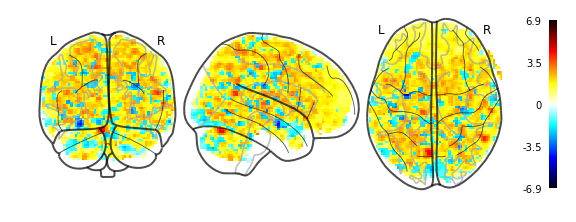

12/17/2018 14:19:10 Reconstruction Error (Frobenius Norm): 1.43288794e+03 out of 1.37661353e+03


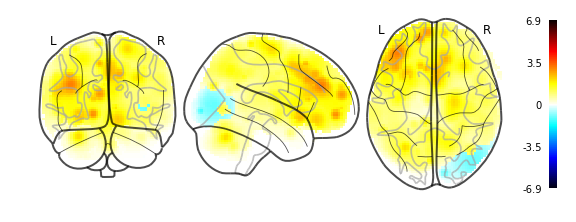

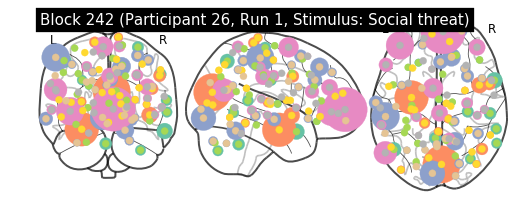

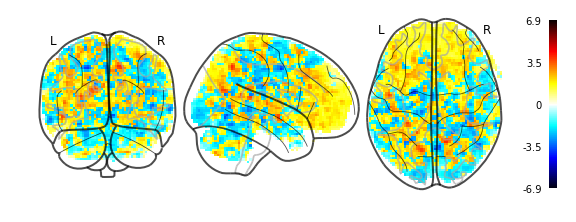

12/17/2018 14:19:14 Reconstruction Error (Frobenius Norm): 1.35265881e+03 out of 1.24866626e+03


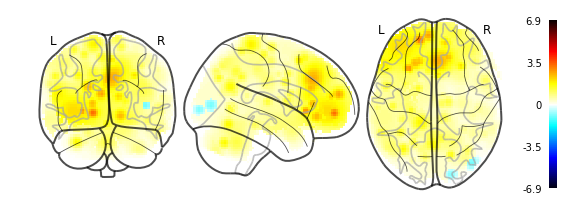

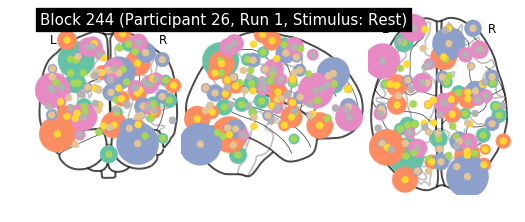

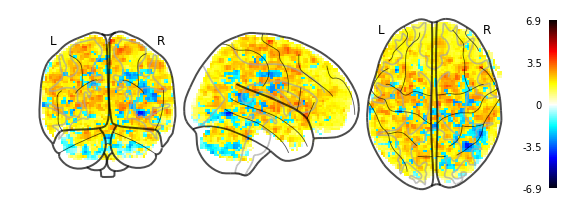

12/17/2018 14:19:18 Reconstruction Error (Frobenius Norm): 1.37504395e+03 out of 1.40211707e+03


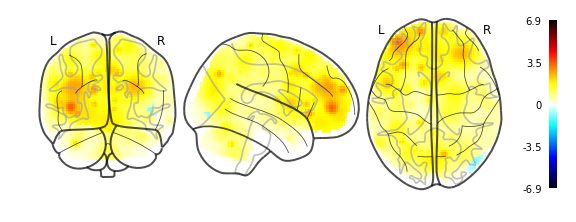

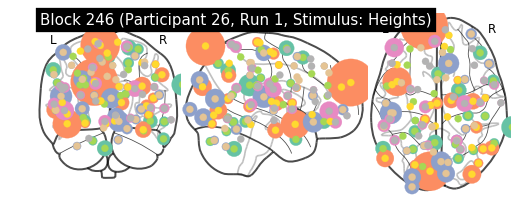

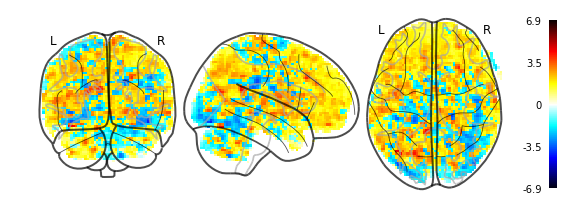

12/17/2018 14:19:22 Reconstruction Error (Frobenius Norm): 1.29722131e+03 out of 1.34629980e+03


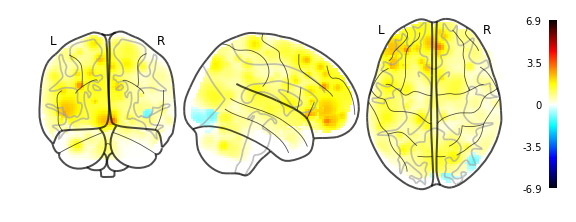

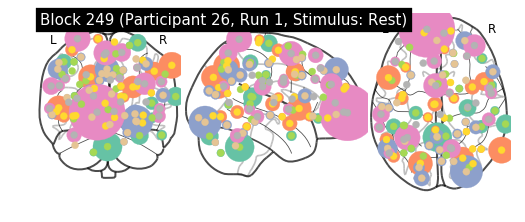

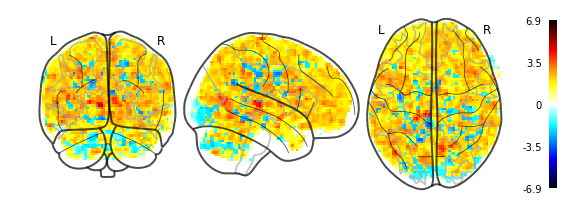

12/17/2018 14:19:25 Reconstruction Error (Frobenius Norm): 1.35148535e+03 out of 1.47934619e+03


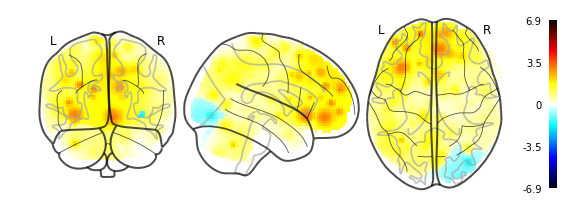

In [16]:
subject_runs = set([(block.subject, block.run) for block in htfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in htfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = htfa._blocks.index(block)
        htfa.plot_factor_centers(index, labeler=task_labeler)
        htfa.plot_original_brain(index)
        htfa.plot_reconstruction(index)


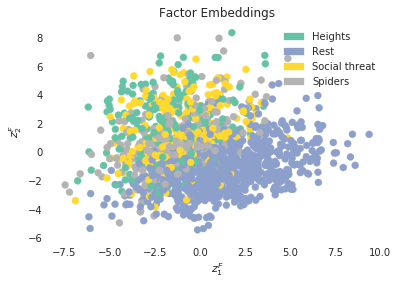

In [17]:
#factor 'embeddings' with PCA
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='PCA')

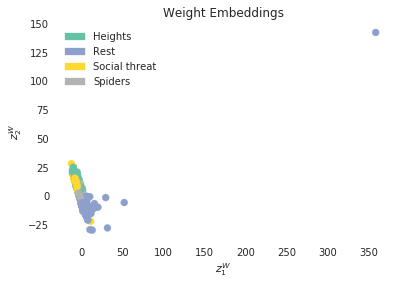

In [18]:
#weight 'embeddings' with PCA
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='PCA')

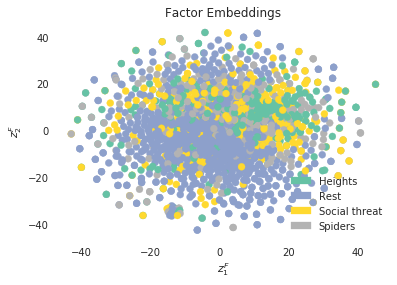

In [19]:
#factor 'embeddings' with TSNE
htfa.scatter_factor_embedding(labeler=task_labeler,embedding='TSNE')

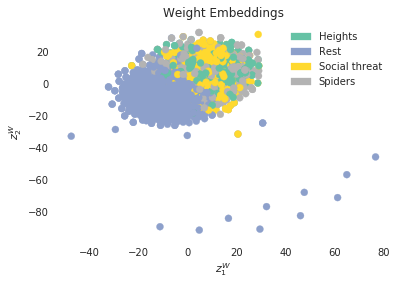

In [20]:
#weight 'embeddings' with TSNE
htfa.scatter_weight_embedding(labeler=task_labeler,embedding='TSNE')